In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.shape

(215, 15)

In [5]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [7]:
df.drop('sl_no',axis=1,inplace=True)

In [8]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(215, 14)

In [11]:
df['salary'].mean()

288655.4054054054

In [12]:
df['salary'].median()

265000.0

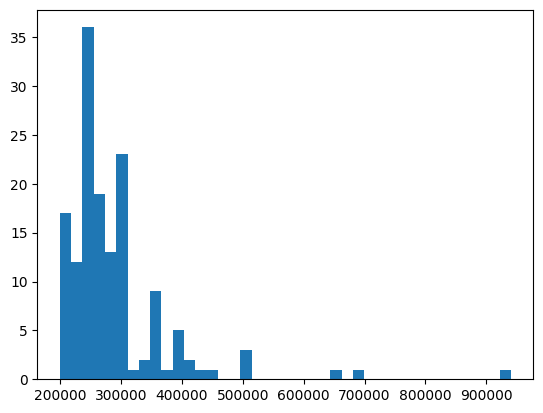

In [13]:
plt.hist(x=df['salary'], bins=40)
plt.show()

In [14]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [15]:
df['salary'] = df['salary'].fillna(0)

In [16]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [17]:
obj = []
for col in df.columns:
    if df[col].dtype == "object":
        obj.append(col)
        print(col,df[col].unique(),len(df[col].unique()))

ssc_b ['Others' 'Central'] 2
hsc_b ['Others' 'Central'] 2
hsc_s ['Commerce' 'Science' 'Arts'] 3
degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others'] 3
workex ['No' 'Yes'] 2
specialisation ['Mkt&HR' 'Mkt&Fin'] 2
status ['Placed' 'Not Placed'] 2


In [18]:
import warnings
warnings.filterwarnings("ignore")

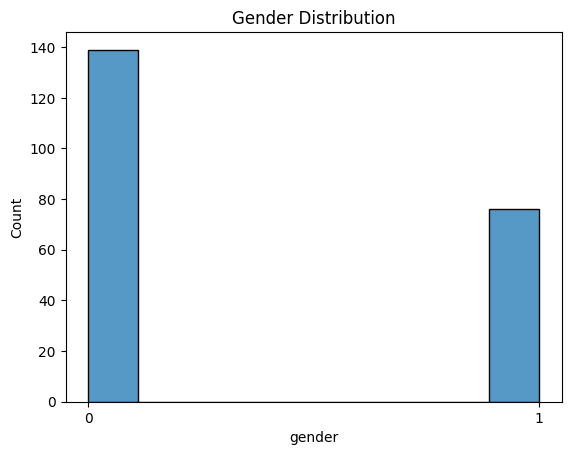

In [19]:
sns.histplot(data=df,x='gender')
plt.title("Gender Distribution")
plt.xticks([0,1],labels=[0,1])
plt.show()

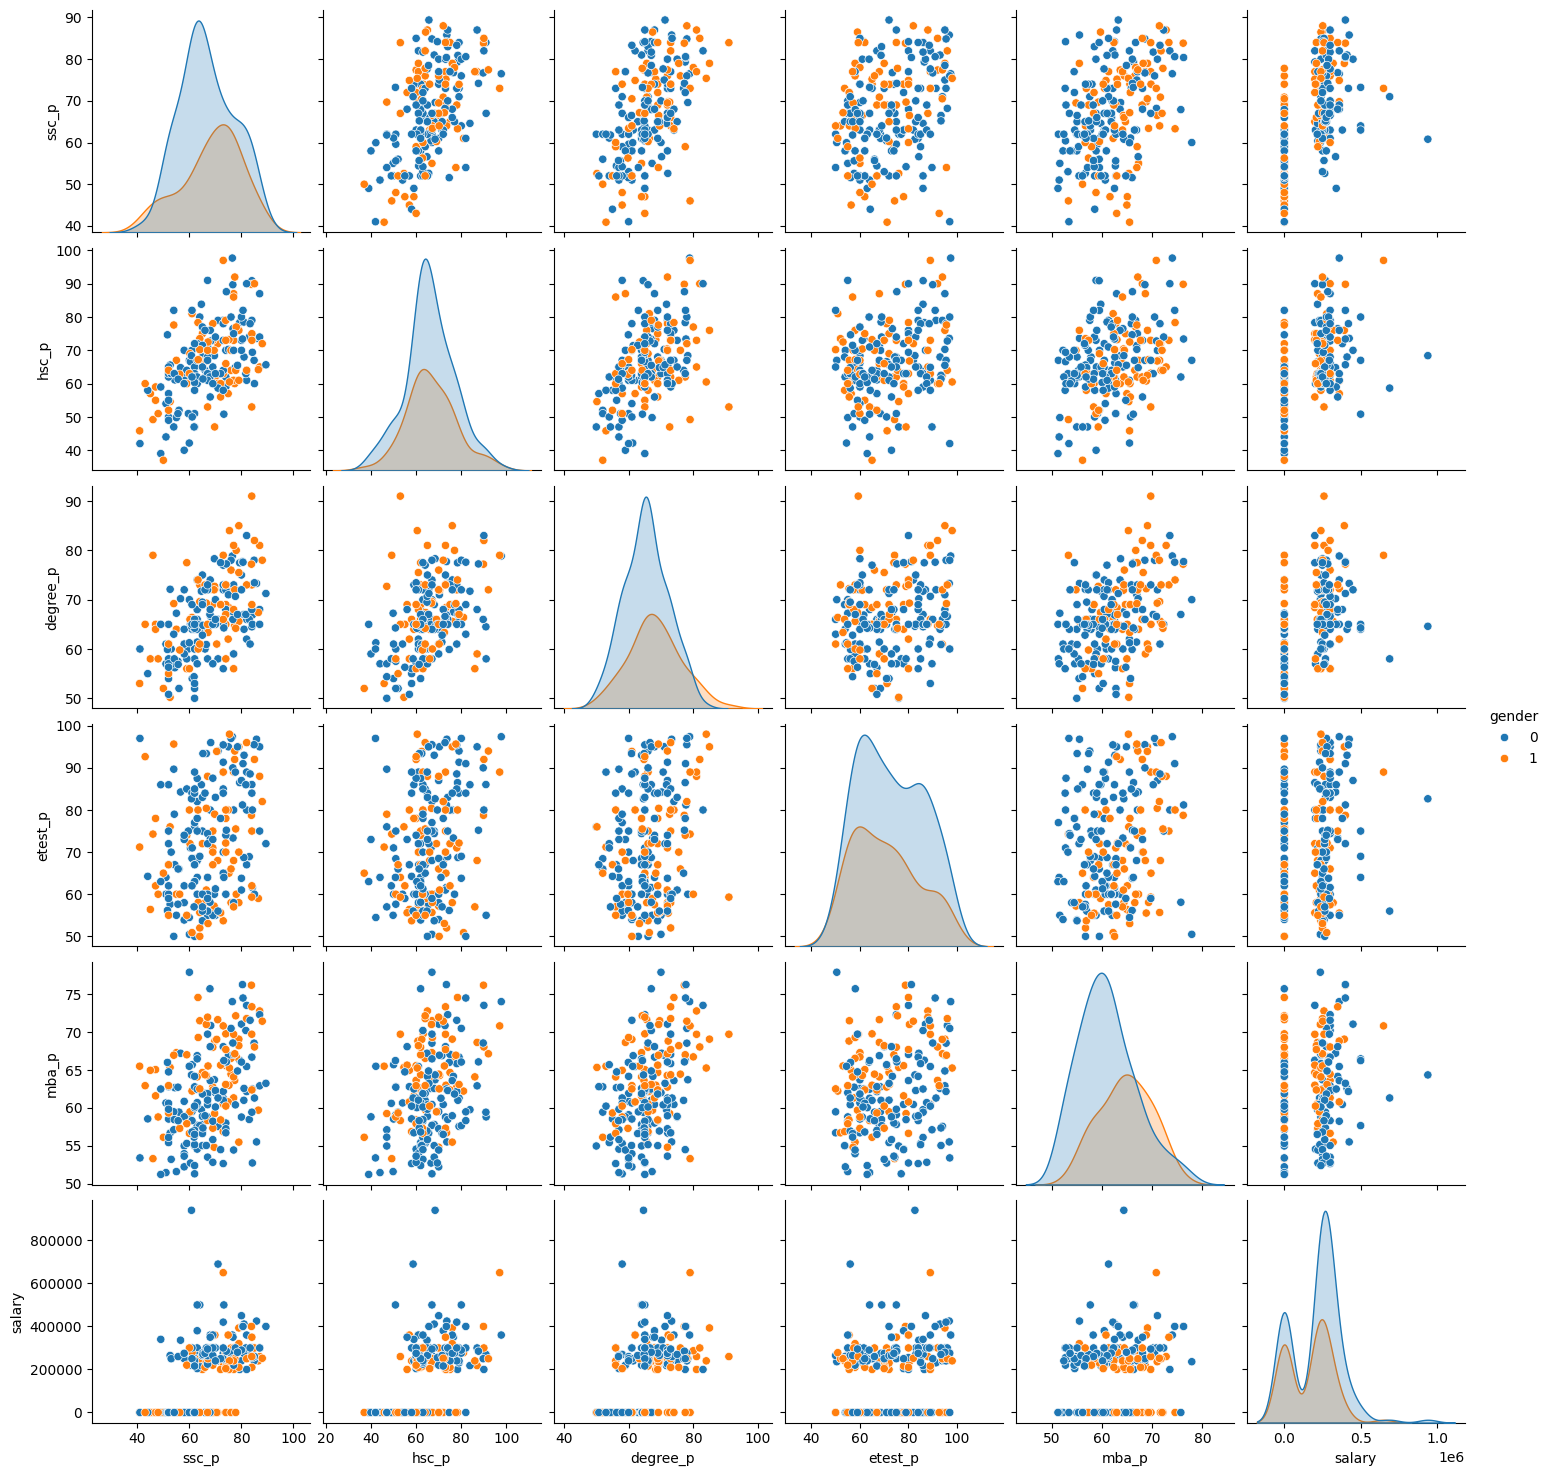

In [21]:
sns.pairplot(data=df, hue='gender')
plt.show()

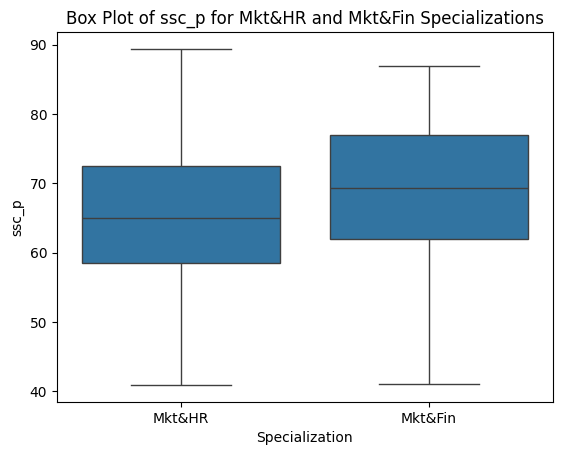

In [22]:
mkt_hr_data = df[df['specialisation'] == 'Mkt&HR']
mkt_fin_data = df[df['specialisation'] == 'Mkt&Fin']
sns.boxplot(x='specialisation', y='ssc_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of ssc_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('ssc_p')
plt.show()

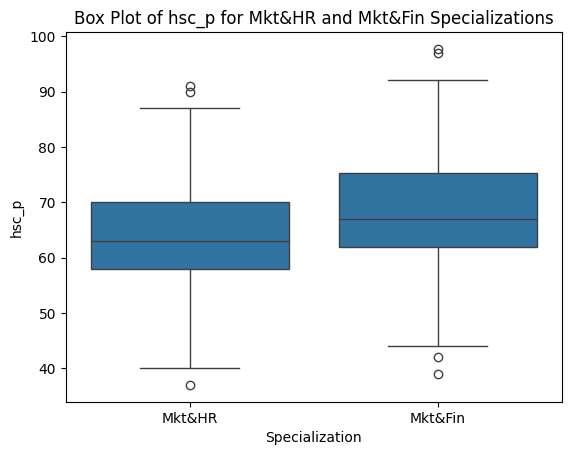

In [23]:
sns.boxplot(x='specialisation', y='hsc_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of hsc_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('hsc_p')
plt.show()

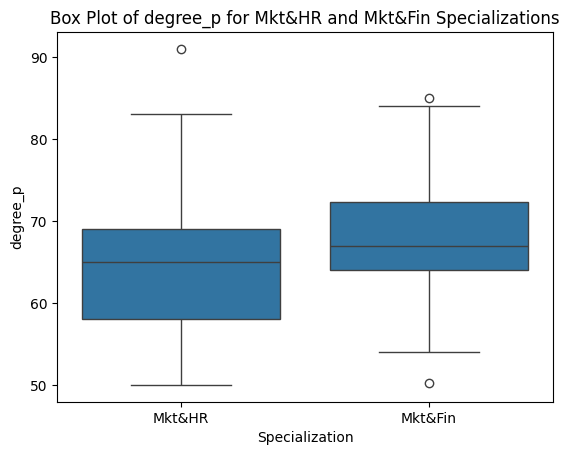

In [24]:
sns.boxplot(x='specialisation', y='degree_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of degree_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('degree_p')
plt.show()

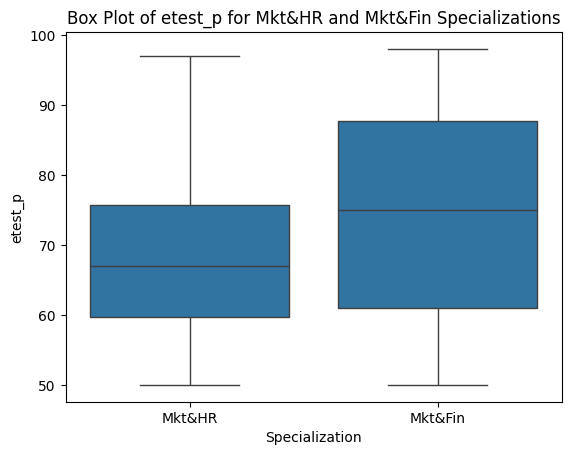

In [25]:
sns.boxplot(x='specialisation', y='etest_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of etest_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('etest_p')
plt.show()

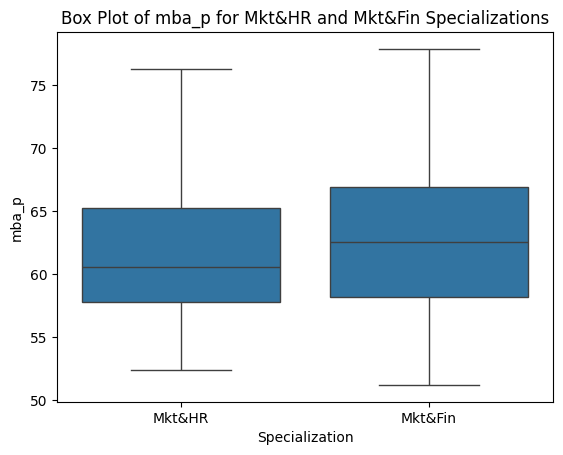

In [26]:
sns.boxplot(x='specialisation', y='mba_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of mba_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('mba_p')
plt.show()

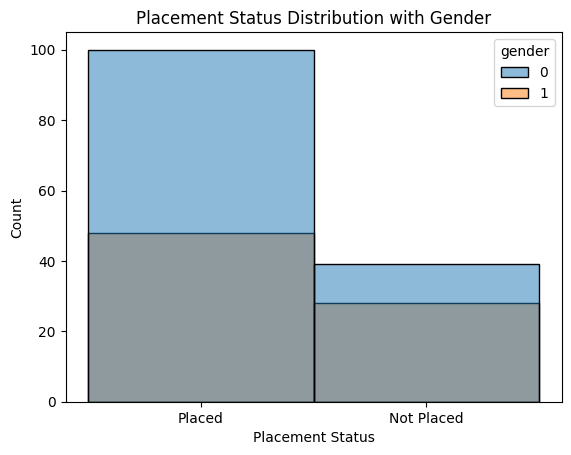

In [27]:
sns.histplot(data=df,x='status',hue='gender')
plt.title('Placement Status Distribution with Gender')
plt.xlabel('Placement Status')
plt.show()

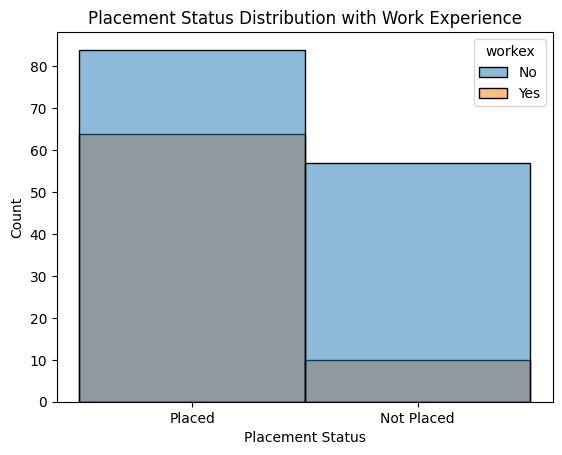

In [28]:
sns.histplot(data=df,x='status',hue='workex')
plt.title('Placement Status Distribution with Work Experience')
plt.xlabel('Placement Status')
plt.show()

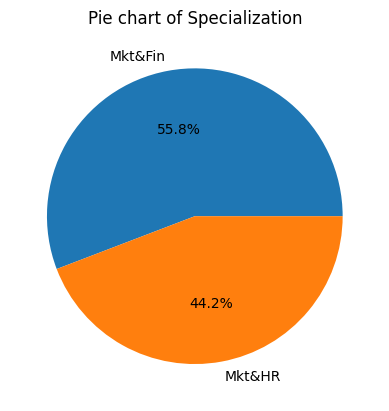

In [29]:
plt.pie(df['specialisation'].value_counts(), labels=df['specialisation'].value_counts().index, autopct='%1.1f%%')
plt.title("Pie chart of Specialization")
plt.show()

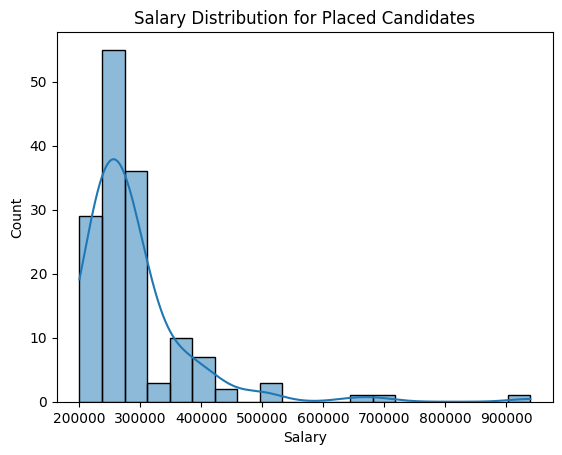

In [30]:
placed_data = df[df['status'] == 'Placed']
sns.histplot(placed_data['salary'], kde=True, bins=20)
plt.title('Salary Distribution for Placed Candidates')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [31]:
cols = []
for col in df.columns:
    if df[col].dtype != "object":
        cols.append(col)

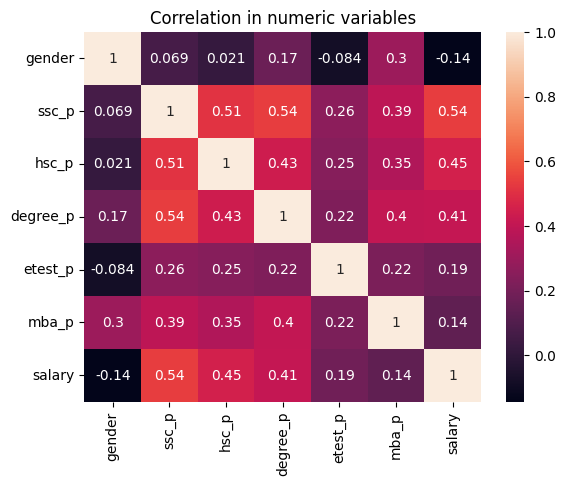

In [32]:
corr = df[cols].corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation in numeric variables')
plt.show()

In [33]:
for col in df.columns:
    if df[col].dtype == "object":
        print(col,df[col].unique(),len(df[col].unique()))

ssc_b ['Others' 'Central'] 2
hsc_b ['Others' 'Central'] 2
hsc_s ['Commerce' 'Science' 'Arts'] 3
degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others'] 3
workex ['No' 'Yes'] 2
specialisation ['Mkt&HR' 'Mkt&Fin'] 2
status ['Placed' 'Not Placed'] 2


In [34]:
df['ssc_b_Central'] = df['ssc_b'].map({'Central':1,'Others':0})

In [37]:
df['hsc_b_Central'] = df['hsc_b'].map({'Central':1,'Others':0})

In [38]:
df['workex'] = df['workex'].map({'No':0,'Yes':1})

In [39]:
df['status'] = df['status'].map({'Placed':1,'Not Placed':0})

In [40]:
df['specialisation_fin'] = df['specialisation'].map({'Mkt&HR':0,'Mkt&Fin':1})

In [41]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,ssc_b_Central,hsc_b_Central,specialisation_fin
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,NaN,55.0,Mkt&HR,58.80,1,270000.0,0,0,0
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,NaN,86.5,Mkt&Fin,66.28,1,200000.0,1,0,1
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,NaN,75.0,Mkt&Fin,57.80,1,250000.0,1,1,1
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,NaN,66.0,Mkt&HR,59.43,0,0.0,1,1,0
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,NaN,96.8,Mkt&Fin,55.50,1,425000.0,1,1,1


In [42]:
df.drop(['ssc_b','hsc_b','specialisation'],axis=1,inplace=True)

In [43]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,mba_p,status,salary,ssc_b_Central,hsc_b_Central,specialisation_fin
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,NaN,55.0,58.80,1,270000.0,0,0,0
1,0,79.33,78.33,Science,77.48,Sci&Tech,NaN,86.5,66.28,1,200000.0,1,0,1
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,NaN,75.0,57.80,1,250000.0,1,1,1
3,0,56.00,52.00,Science,52.00,Sci&Tech,NaN,66.0,59.43,0,0.0,1,1,0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,NaN,96.8,55.50,1,425000.0,1,1,1


In [44]:
ohe = pd.get_dummies(df[['hsc_s','degree_t']],drop_first=True).astype(int)
ohe

,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,1,0,0,1
1,0,1,0,1
2,0,0,0,0
3,0,1,0,1
4,1,0,0,0
...,...,...,...,...
210,1,0,0,0
211,0,1,0,1
212,1,0,0,0
213,1,0,0,0


In [45]:
df1 = pd.concat([ohe,df.drop(['hsc_s','degree_t'],axis=1)],axis=1)
df1.head()

,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,ssc_b_Central,hsc_b_Central,specialisation_fin
0,1,0,0,1,0,67.00,91.00,58.00,NaN,55.0,58.80,1,270000.0,0,0,0
1,0,1,0,1,0,79.33,78.33,77.48,NaN,86.5,66.28,1,200000.0,1,0,1
2,0,0,0,0,0,65.00,68.00,64.00,NaN,75.0,57.80,1,250000.0,1,1,1
3,0,1,0,1,0,56.00,52.00,52.00,NaN,66.0,59.43,0,0.0,1,1,0
4,1,0,0,0,0,85.80,73.60,73.30,NaN,96.8,55.50,1,425000.0,1,1,1


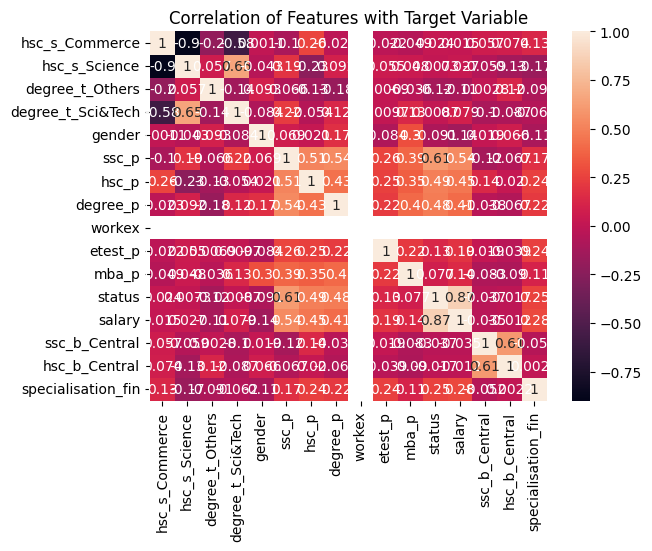

In [46]:
corr1 = df1.corr()
sns.heatmap(corr1,annot=True)
plt.title('Correlation of Features with Target Variable')
plt.show()

In [47]:
correlated_variable = corr1['salary'].abs().sort_values(ascending=False)

In [48]:
correlated_variable

salary                1.000000
status                0.865774
ssc_p                 0.538090
hsc_p                 0.452569
degree_p              0.408371
specialisation_fin    0.275766
etest_p               0.186988
gender                0.143110
mba_p                 0.139823
degree_t_Others       0.107139
degree_t_Sci&Tech     0.079351
ssc_b_Central         0.034594
hsc_s_Science         0.026890
hsc_s_Commerce        0.015239
hsc_b_Central         0.011544
workex                     NaN
Name: salary, dtype: float64

In [49]:
X = df1.drop('salary',axis=1)
X

,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,ssc_b_Central,hsc_b_Central,specialisation_fin
0,1,0,0,1,0,67.00,91.00,58.00,NaN,55.0,58.80,1,0,0,0
1,0,1,0,1,0,79.33,78.33,77.48,NaN,86.5,66.28,1,1,0,1
2,0,0,0,0,0,65.00,68.00,64.00,NaN,75.0,57.80,1,1,1,1
3,0,1,0,1,0,56.00,52.00,52.00,NaN,66.0,59.43,0,1,1,0
4,1,0,0,0,0,85.80,73.60,73.30,NaN,96.8,55.50,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,0,0,0,80.60,82.00,77.60,NaN,91.0,74.49,1,0,0,1
211,0,1,0,1,0,58.00,60.00,72.00,NaN,74.0,53.62,1,0,0,1
212,1,0,0,0,0,67.00,67.00,73.00,NaN,59.0,69.72,1,0,0,1
213,1,0,0,0,1,74.00,66.00,58.00,NaN,70.0,60.23,1,0,0,0


In [50]:
y = df1['salary']

In [52]:
y

0      270000.0
1      200000.0
2      250000.0
3           0.0
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, Length: 215, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train

,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,ssc_b_Central,hsc_b_Central,specialisation_fin
93,1,0,0,0,0,52.00,62.0,54.0,NaN,72.00,55.41,0,1,1,0
84,0,1,0,1,0,70.00,63.0,70.0,NaN,55.00,62.00,1,1,0,1
95,1,0,0,0,0,73.00,78.0,65.0,NaN,95.46,62.16,1,1,0,1
137,1,0,0,0,0,67.00,63.0,72.0,NaN,56.00,60.41,1,0,1,0
210,1,0,0,0,0,80.60,82.0,77.6,NaN,91.00,74.49,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,1,0,1,0,61.08,50.0,54.0,NaN,71.00,65.69,0,0,0,1
14,1,0,0,0,0,62.00,47.0,50.0,NaN,76.00,54.96,0,1,1,0
92,0,1,0,0,1,60.23,69.0,66.0,NaN,72.00,59.47,1,1,1,1
179,0,1,0,1,1,77.80,64.0,64.2,NaN,75.50,72.14,0,1,1,0


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)
reg.score(X_test_scaled,y_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Finding best model

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [75]:
algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {

        }
    },
    'lasso': {
        'model': Lasso(max_iter=100000),
        'params': {
            'alpha': [1,2],
            'selection': ['random','cyclic']
        }
    },
    'ridge': {
        'model': Ridge(max_iter=100000),
        'params': {
            'alpha': [1,2]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'splitter': ['best','random']
        }
    },
    'svr': {
        'model': SVR(max_iter=10000000),
        'params': {
         
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [1,5,10,20,50]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [1,5,10,20,50],
            'learning_rate': [0.001,0.01,0.1,0.5]
        }
    }
}

In [76]:
X_scaled = scaler.transform(X)

In [77]:
scores= []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
for algo_name, mp in algos.items():
   reg = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
   reg.fit(X_scaled, y)
   scores.append(
      {
         'model': algo_name,
         'best_score': reg.best_score_,
         'best_params': reg.best_params_
      }
   ) 

In [78]:
score = pd.DataFrame(scores, columns=['model','best_score','best_params'])
score

,model,best_score,best_params
0,linear_regression,0.717640,{}
1,lasso,0.717644,"{'alpha': 2, 'selection': 'random'}"
2,ridge,0.716467,{'alpha': 1}
3,decision_tree,0.652944,"{'criterion': 'absolute_error', 'splitter': 'r..."
4,svr,-0.110433,{}
5,random_forest,0.695185,{'n_estimators': 10}
6,gradient_boosting,0.692711,"{'learning_rate': 0.1, 'n_estimators': 20}"


### Training Ridge model

In [86]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled,y_train)
ridge.score(X_test_scaled,y_test)

0.7219489075732639

In [87]:
import pickle

### Saving our model

In [88]:
with open('model.pkl','wb') as f:
    pickle.dump(ridge,f)

### Saving our scaler

In [89]:
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)